# Suicide Rates Overview - 1985 to 2016

## Machine Learning Pipeline Explanation

For the Suicides Rates Overview from 1985 to 2016 data, the intention is to predict number of suicides that in the future and according with the different socio-economic characteristics of every person we can determine how likely they could be of committing suicide. To solve this problem, the cleaning process will help to define how clean the data is to feed the model, as well as removing null values or columns that are not valuable enough for either lack of information or being duplicated in the data, afterwards proceed to transform the data in the case of having categorical variables and implemented Decision Tree Regressor, model selected to solved this problem, results will be measured using Mean Absolute Error and plotted according to Predicted Values vs Actual Values. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set some Pandas options 
#pd.set_option('display.notebook_repr_html', False) 
#pd.set_option('display.max_columns', 40) 
#pd.set_option('display.max_rows', 25) 
#pd.options.display.max_colwidth = 50 

# Load and Clean Dataset


In [2]:
#dataset read 
rates = pd.read_csv('suicide-rates.csv')

#show data first 5 rows
rates.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
#random rows in dataset
rates.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
11912,Iceland,2004,female,75+ years,0,9282,0.00,Iceland2004,NaN,"13,722,824,251",50528,Silent
25479,Trinidad and Tobago,1998,male,5-14 years,1,129083,0.77,Trinidad and Tobago1998,NaN,"6,043,694,330",5175,Millenials
25100,Thailand,1998,male,35-54 years,1127,7751471,14.54,Thailand1998,NaN,"113,675,706,127",2005,Boomers
24800,Switzerland,2001,male,35-54 years,325,1108319,29.32,Switzerland2001,NaN,"278,631,271,391",40582,Boomers
1923,Austria,1996,male,15-24 years,108,498112,21.68,Austria1996,NaN,"237,250,948,791",31660,Generation X


In [4]:
#headings of the feature values
rates.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
#Rename columns
rates.rename(columns={'country': 'Country', 
                      'year': 'Year',
                      'sex': 'Sex',
                      'age': 'Age',
                      'suicides_no': 'SuicidesNo',
                      'population': 'Population',
                      'suicides/100k pop': 'Suicides100kPop',
                      'country-year': 'CountryYear',
                      'HDI for year': 'HDIForYear',
                      ' gdp_for_year ($) ': 'GDPForYear$',
                      'gdp_per_capita ($)': 'GDPPerCapita$',
                      'generation': 'Generation'}, inplace=True)

In [6]:
# Rows and Columns 
rates.shape

(27820, 12)

In [7]:
#data types and numerical values
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
Country            27820 non-null object
Year               27820 non-null int64
Sex                27820 non-null object
Age                27820 non-null object
SuicidesNo         27820 non-null int64
Population         27820 non-null int64
Suicides100kPop    27820 non-null float64
CountryYear        27820 non-null object
HDIForYear         8364 non-null float64
GDPForYear$        27820 non-null object
GDPPerCapita$      27820 non-null int64
Generation         27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
import locale
from locale import atof
print(locale.setlocale(locale.LC_NUMERIC, ''))
rates['GDPForYear$'] = rates['GDPForYear$'].apply(atof)

en_IE.UTF-8


In [9]:
rates['GDPForYear$'] = rates['GDPForYear$'].astype(int)

In [10]:
#Analysis of all our numerical data
rates.describe()

,Year,SuicidesNo,Population,Suicides100kPop,HDIForYear,GDPForYear$,GDPPerCapita$
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,4.455810e+11,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,1.453610e+12,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,4.691962e+07,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,8.985353e+09,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,4.811469e+10,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,2.602024e+11,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,1.812071e+13,126352.000000


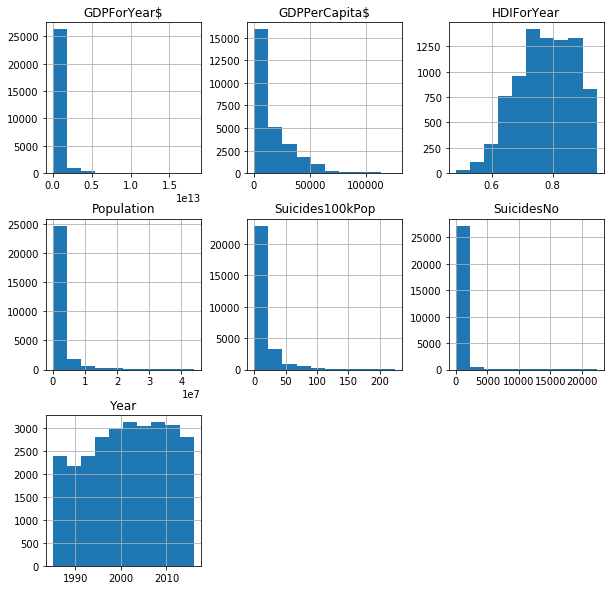

In [11]:
# Numerical data Distribution 
rates.hist(figsize=[10,10]);

In [12]:
# Percentage of Null Values
rates.isna().mean().round(4) * 100

Country             0.00
Year                0.00
Sex                 0.00
Age                 0.00
SuicidesNo          0.00
Population          0.00
Suicides100kPop     0.00
CountryYear         0.00
HDIForYear         69.94
GDPForYear$         0.00
GDPPerCapita$       0.00
Generation          0.00
dtype: float64

In [13]:
#Number of nll values
rates.isnull().sum()

Country                0
Year                   0
Sex                    0
Age                    0
SuicidesNo             0
Population             0
Suicides100kPop        0
CountryYear            0
HDIForYear         19456
GDPForYear$            0
GDPPerCapita$          0
Generation             0
dtype: int64

In [14]:
rates = rates.drop(['HDIForYear', 'CountryYear'],axis=1)

In [15]:
#Save final dataset
#rates.to_csv('suicide_rates.csv')

Observations:

- The column **GDPForYear$** that represents the Gross Domestic Product (GDP) per year was string datatype and it was converted to string after removing the commas and setting the datatype
-  Almost 70% of the data in the **HDI for year** column is missings that represents 19.456 data points, therefore for the purpose of this analysis I don't consider this column valuable 
- Furthermore the **country-year** column does not add any value to the analysis, as this information can be found in the **country** and **year** column respectively
- Both columns will be dropped of the final dataset to be used for analysis.

# Exploratory Data Analysis

In [16]:
#Read Dataset
suicide_rates = pd.read_csv('suicide_rates.csv', index_col=0)

#Show data first 5 rows
suicide_rates.head()

,Country,Year,Sex,Age,SuicidesNo,Population,Suicides100kPop,GDPForYear$,GDPPerCapita$,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


In [17]:
suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27820 entries, 0 to 27819
Data columns (total 10 columns):
Country            27820 non-null object
Year               27820 non-null int64
Sex                27820 non-null object
Age                27820 non-null object
SuicidesNo         27820 non-null int64
Population         27820 non-null int64
Suicides100kPop    27820 non-null float64
GDPForYear$        27820 non-null int64
GDPPerCapita$      27820 non-null int64
Generation         27820 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 2.3+ MB


Suicide Rate per year

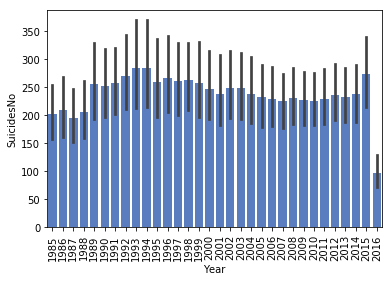

In [18]:
sns.set_color_codes("muted")
sns.barplot(x="Year", y="SuicidesNo", data=suicide_rates,
            label="Year Suicides", color="b")
plt.xticks(rotation=90);

This plot shows the suicide rate per year (1986 to 2016) being 1993 and 1994 the years with the highest number of suicides with over 350 people, following by 2015, and the lowest by far 2016

Correlations between features in the dataset

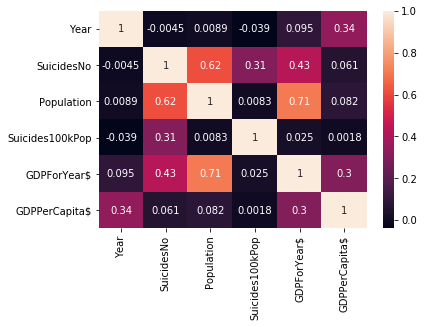

In [19]:
sns.heatmap(suicide_rates.corr(), annot=True);

Distribution according to gender

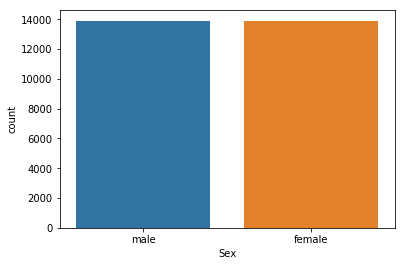

In [20]:
sns.countplot(x='Sex', data=suicide_rates);

In [21]:
suicide_rates.Sex.value_counts()

male      13910
female    13910
Name: Sex, dtype: int64

This plot shows equal distribution of suicides numbers per gender in the data

Distribution according to Age per gender 

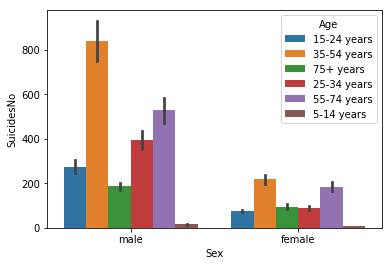

In [22]:
sns.barplot(x='Sex', y='SuicidesNo', hue='Age', data=suicide_rates);

In [23]:
suicide_rates.groupby(['Age','Sex']).size()

Age          Sex   
15-24 years  female    2321
             male      2321
25-34 years  female    2321
             male      2321
35-54 years  female    2321
             male      2321
5-14 years   female    2305
             male      2305
55-74 years  female    2321
             male      2321
75+ years    female    2321
             male      2321
dtype: int64

- This plot shows the numbers of suicides commited by the people of different age groups depending on their gender. 
    * The highest suicide rate is in the age group of 35-54 years in both genders (Female and Male)
    * The lowest suicide rate is in the age group of 5-14 years.

Distribution according to Generation per gender 

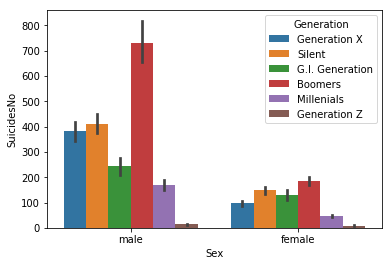

In [24]:
sns.barplot(x='Sex', y='SuicidesNo', hue='Generation', data=suicide_rates);

In [25]:
suicide_rates["Generation"].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: Generation, dtype: int64

In [26]:
suicide_rates.groupby(['Generation','Sex']).size()

Generation       Sex   
Boomers          female    2495
                 male      2495
G.I. Generation  female    1372
                 male      1372
Generation X     female    3204
                 male      3204
Generation Z     female     735
                 male       735
Millenials       female    2922
                 male      2922
Silent           female    3182
                 male      3182
dtype: int64

- This plot shows the numbers of suicides commited by the people of different generations depending on their gender.
  * The suicide numbers are higher in the generation of Boomers  in both genders (Female and Male)
  * The suicide numbers are lower in the Generation Z.

Distribution according to population per gender accross the years

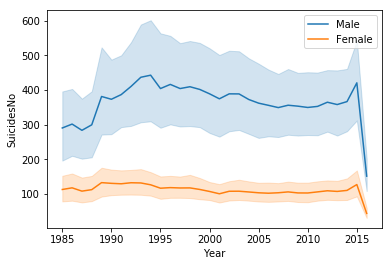

In [27]:
# Grouping data
male   = suicide_rates.loc[suicide_rates.loc[:, 'Sex']=='male',:]
female = suicide_rates.loc[suicide_rates.loc[:, 'Sex']=='female',:]
#Plot
m = sns.lineplot(x='Year', y='SuicidesNo', data=male)
f = sns.lineplot(x='Year', y='SuicidesNo', data=female)

_ = plt.legend(['Male', 'Female'])

This plots shows the change in suicide numbers per gender (Female and Male) population from 1986 to 2016

Distribution according to age per gender accross the years

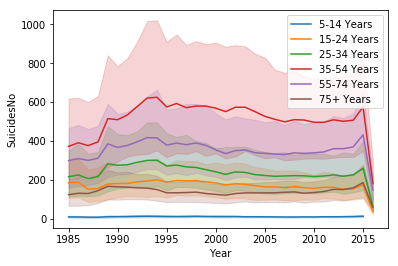

In [28]:
#Grouping data per age population
age_5_14  = suicide_rates.loc[suicide_rates.loc[:, 'Age']=='5-14 years',:]
age_15_24 = suicide_rates.loc[suicide_rates.loc[:, 'Age']=='15-24 years',:]
age_25_34 = suicide_rates.loc[suicide_rates.loc[:, 'Age']=='25-34 years',:]
age_35_54 = suicide_rates.loc[suicide_rates.loc[:, 'Age']=='35-54 years',:]
age_55_74 = suicide_rates.loc[suicide_rates.loc[:, 'Age']=='55-74 years',:]
age_75    = suicide_rates.loc[suicide_rates.loc[:, 'Age']=='75+ years',:]

#Plot
a = sns.lineplot(x='Year', y='SuicidesNo', data=age_5_14)
b = sns.lineplot(x='Year', y='SuicidesNo', data=age_15_24)
c = sns.lineplot(x='Year', y='SuicidesNo', data=age_25_34)
d = sns.lineplot(x='Year', y='SuicidesNo', data=age_35_54)
e = sns.lineplot(x='Year', y='SuicidesNo', data=age_55_74)
f = sns.lineplot(x='Year', y='SuicidesNo', data=age_75)

_ = plt.legend(['5-14 Years', '15-24 Years', '25-34 Years', '35-54 Years', '55-74 Years', '75+ Years'])

This plots shows the change in suicide numbers per age (From 5 to 75+ years old) population from 1986 to 2016

Distribution according to generation per gender accross the years

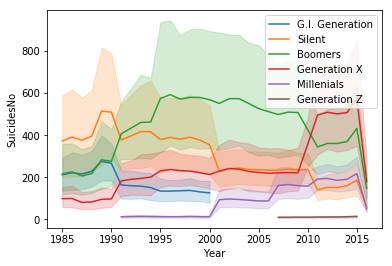

In [29]:
#Grouping data per age population
gen_gi = suicide_rates.loc[suicide_rates.loc[:, 'Generation']=='G.I. Generation',:]
gen_s = suicide_rates.loc[suicide_rates.loc[:, 'Generation']=='Silent',:]
gen_b = suicide_rates.loc[suicide_rates.loc[:, 'Generation']=='Boomers',:]
gen_x = suicide_rates.loc[suicide_rates.loc[:, 'Generation']=='Generation X',:]
gen_m = suicide_rates.loc[suicide_rates.loc[:, 'Generation']=='Millenials',:]
gen_z = suicide_rates.loc[suicide_rates.loc[:, 'Generation']=='Generation Z',:]

#Plot
g = sns.lineplot(x='Year', y='SuicidesNo', data=gen_gi)
h = sns.lineplot(x='Year', y='SuicidesNo', data=gen_s)
i = sns.lineplot(x='Year', y='SuicidesNo', data=gen_b)
j = sns.lineplot(x='Year', y='SuicidesNo', data=gen_x)
k = sns.lineplot(x='Year', y='SuicidesNo', data=gen_m)
l = sns.lineplot(x='Year', y='SuicidesNo', data=gen_z)

_ = plt.legend(['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z'])

This plots shows the change in suicide numbers per Generation population from 1986 to 2016

| Generation     |   Year      |
|----------------|-------------|
| G.I. Generation| 1900-1920   |
| Silent         | 1921-1940   |  
| Boomers        | 1941-1960   |
| Generation X   | 1961-1980   |
| Millenials     | 1981-2000   | 
| Generation Z   | 2001-present|

Distribution of features per gender

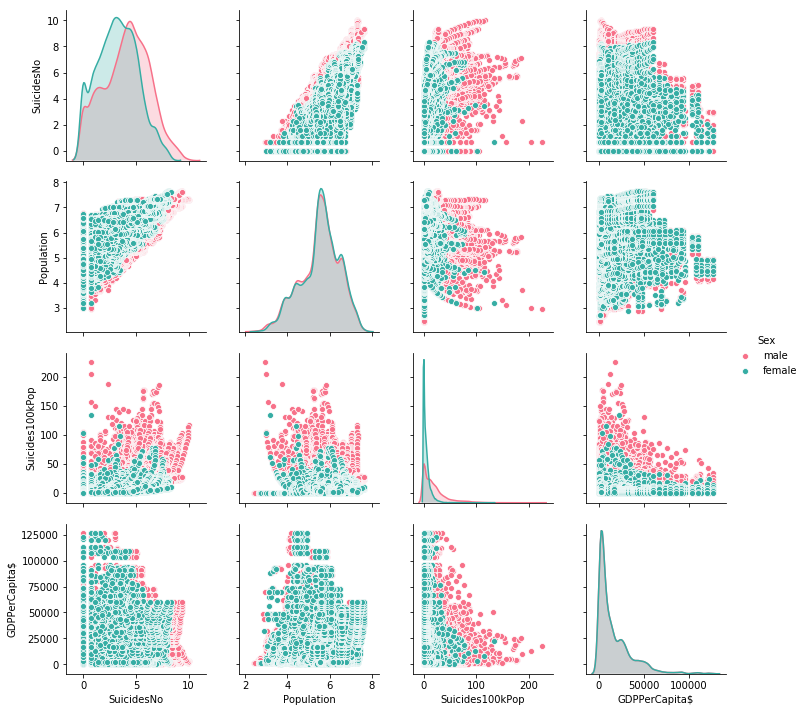

In [30]:
m = suicide_rates['Sex']
n = suicide_rates['Age']
o = suicide_rates['SuicidesNo']
p = suicide_rates['Population']
q = suicide_rates['Suicides100kPop']
r = suicide_rates['GDPPerCapita$']

sns.pairplot(pd.DataFrame(list(zip(m, n, np.log(o), np.log10(p), q, r)), 
                        columns=['Sex','Age', 'SuicidesNo', 'Population', 'Suicides100kPop', 
                                 'GDPPerCapita$']), hue='Sex', palette="husl");

Distribution Suicides Number per Top 15 countries

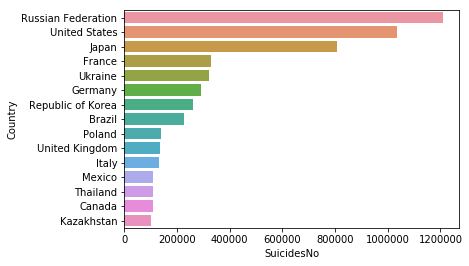

In [31]:
#Grouping the Data
suicidesNo=[]
for country in suicide_rates.Country.unique():
    suicidesNo.append(sum(suicide_rates[suicide_rates['Country']==country].SuicidesNo))   
    
#Creating Dataframes
suicidesNo = pd.DataFrame(suicidesNo,columns=['SuicidesNo'])
country = pd.DataFrame(suicide_rates.Country.unique(),columns=['Country'])
suicide_country = pd.concat([suicidesNo,country], axis=1)

#Sorting the data
suicide_country=suicide_country.sort_values(by='SuicidesNo',ascending=False)

#Plot
sns.barplot(y=suicide_country.Country[:15],x=suicide_country.SuicidesNo[:15]);

This plots shows the number of suicides in the Top 15 country with the highest numbers of suicides, starting with Russian Federation with over 1mill in total follwed by the United States, and with the lowest number of the 15 countries Canada and Kazakhstan with over 100k across the years

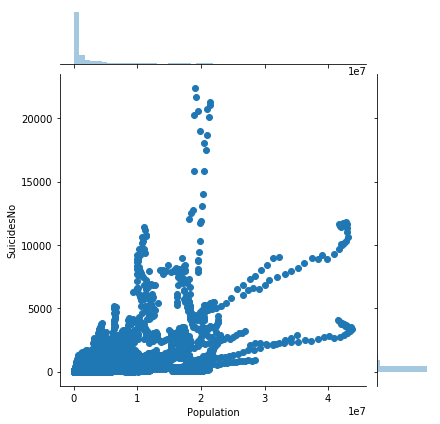

In [32]:
sns.jointplot(y='SuicidesNo',x='Population',data=suicide_rates);

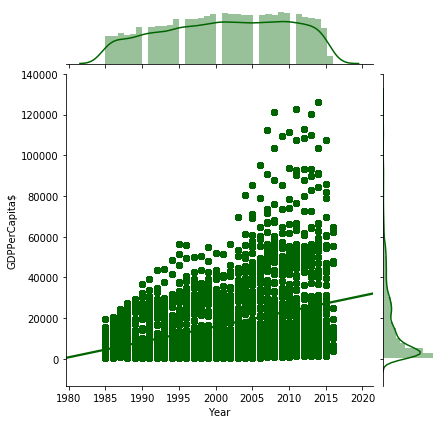

In [33]:
sns.jointplot("Year", "GDPPerCapita$", data=suicide_rates, kind="reg", color='darkgreen');

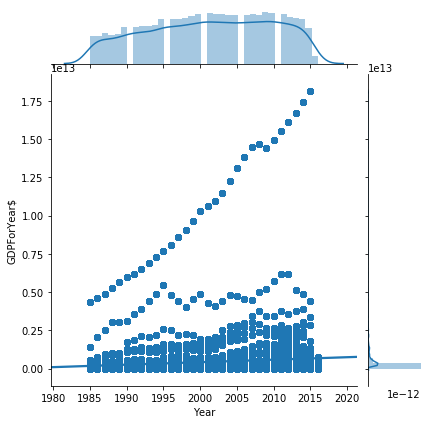

In [34]:
sns.jointplot("Year", "GDPForYear$", data=suicide_rates, kind="reg");

## Feature Engineering

In [35]:
suicide_rates.head()

,Country,Year,Sex,Age,SuicidesNo,Population,Suicides100kPop,GDPForYear$,GDPPerCapita$,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
#Get Label Encoder variables per categorical variables in the dataset
suicides = suicide_rates
suicides['Country'] = le.fit_transform(suicides.Country)
suicides['Sex'] = le.fit_transform(suicides.Sex)
suicides['Age'] = le.fit_transform(suicides.Age)
suicides['Generation'] = le.fit_transform(suicides.Generation)
suicides.head()

,Country,Year,Sex,Age,SuicidesNo,Population,Suicides100kPop,GDPForYear$,GDPPerCapita$,Generation
0,0,1987,1,0,21,312900,6.71,2156624900,796,2
1,0,1987,1,2,16,308000,5.19,2156624900,796,5
2,0,1987,0,0,14,289700,4.83,2156624900,796,2
3,0,1987,1,5,1,21800,4.59,2156624900,796,1
4,0,1987,1,1,9,274300,3.28,2156624900,796,0


For the pre-processing our feature engineering steps, as the data contains several categorical variables, such as Country, Sex, Age and Generation, they were label encoded to create continuos variables in the enyire datset that the model architecure seclected is capable of handling. 

# Modeling

In [38]:
X = suicides[['Sex', 'Age', 'Population','Suicides100kPop', 'GDPForYear$', 'GDPPerCapita$', 'Generation']]
y = suicides[['SuicidesNo']]

In [39]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size = 0.2,random_state=42)
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(22256, 7) (22256, 1)
(5564, 7) (5564, 1)


For the data splitting process, the classical split was selected as is suffixe the prolem to be solved. In this case an 80% for training data vs 20% for test data was selected. Furthermore, a Decision Tree Regressor was selected as model architecture to work on this problem. Why? A Supervised Model using a Regression technique will give us a number a not a label, and that is what we are looking for, to define predicted values vs actual values of suicides number. 

Decision Tree Regressor + GridSearchCV

In [40]:
#Model
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
#Pipeline
from sklearn.pipeline import make_pipeline
#Metrics
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

In [41]:
mae_score = make_scorer(mean_absolute_error, greater_is_better=False)

In [42]:
# Make an array of depths to choose from
depths = np.arange(1, 11)
depths

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [43]:
#Number of leafs
num_leafs = [1, 5, 10, 20, 50, 100]
num_leafs

[1, 5, 10, 20, 50, 100]

In [44]:
param_grid = [{'decisiontreeregressor__max_depth':depths,
               'decisiontreeregressor__min_samples_leaf':num_leafs}]

In [45]:
#Model Pipeline
pipeline_tree = make_pipeline(tree.DecisionTreeRegressor(random_state=1))

In [46]:
gs = GridSearchCV(estimator=pipeline_tree, param_grid=param_grid, scoring=mae_score, cv=10)

In [47]:
gs = gs.fit(train_x,train_y)

In [48]:
print('Best Score:', -gs.best_score_)
print('Best Parameters:', gs.best_params_)

Best Score: 16.126798083409124
Best Parameters: {'decisiontreeregressor__max_depth': 10, 'decisiontreeregressor__min_samples_leaf': 1}


In [49]:
model = gs.best_estimator_

In [50]:
model.fit(train_x,train_y)

Pipeline(memory=None,
     steps=[('decisiontreeregressor', DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best'))])

In [51]:
predict = model.predict(test_x)

As improvement of the model GridSearch was used to tune the model and get better results, with the intention of 

<Figure size 432x288 with 0 Axes>

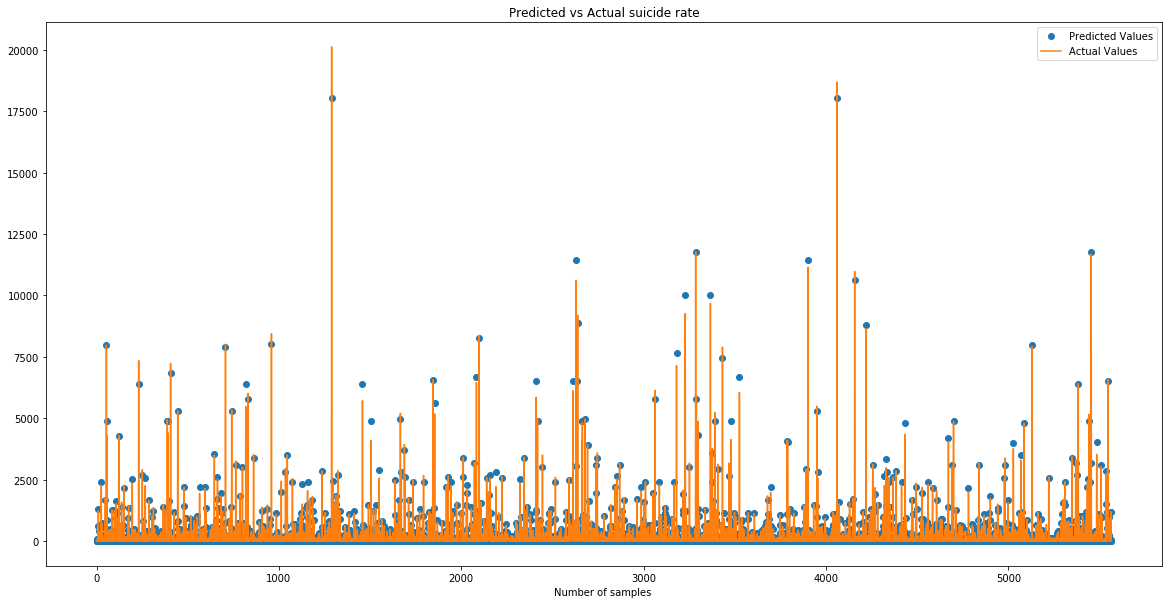

In [52]:
plt.figure(1);
plt.figure(figsize = (20,10));
plt.plot(np.arange(len(predict)),predict, 'o', label = "Predicted Values");
plt.title('Predicted vs Actual suicide rate');
plt.xlabel("Number of samples ");
plt.plot(np.arange(len(predict)),test_y.values, label = "Actual Values");
plt.legend(loc = 'best');

In [53]:
mae = mean_absolute_error(test_y, predict)
print("MAE: %.4f" % mae)

MAE: 14.9933


As our error will be defined as Predicted Value - Actual Value, Mean Absolute Error (MAE) will refer to a the results of measuring the difference between two continuous variables. In this case the relation how many people commit suicide? comparing the actual value to the predicted one. The prediction made was taking into account these values Sex, Age, and Generation (categorical variables transform into continuous) and  Population, Suicides100kPop, GDPForYear$ and GDPPerCapita$ (as continuous variables), therefore a MAE 10.41 implies that at least 10 people will commit suicide, independently of the any variables aforementioned.

For this problem Mean Absolute Error (MAE) was selected based on the characteristics of the problem, because penalizes less negative errors, that means that lower values are better, expressing an average of the model prediction in relation to our variable of interest (Suicides Number)

### Reference:

- https://seaborn.pydata.org/
- https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners
- https://www.kaggle.com/kralmachine/seaborn-tutorial-for-beginners
- https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
- https://stackoverflow.com/questions/22137723/convert-number-strings-with-commas-in-pandas-dataframe-to-float
- https://stackoverflow.com/questions/39553866/use-apply-with-pandas-series
- https://theconversation.com/how-ai-is-helping-to-predict-and-prevent-suicides-91460 
- https://medium.com/@ewuramaminka/mean-absolute-error-mae-machine-learning-ml-b9b4afc63077
- https://www.quora.com/What-is-the-difference-between-squared-error-and-absolute-error